# Homework 1

In [6]:
import numpy as np
import sympy as sy
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from fractions import Fraction

import utils as utils

import importlib
importlib.reload(utils)

%matplotlib inline

sy.init_printing()
utils.load_custom_styles()

---
## Review 3.6

<img src="figures/homework-01/ex1.png" width="800" />



The $z$-transform can be computed as follows:
$$
X[z] = \sum_{n=-\infty}^{\infty} x[n] z^{-n}
$$

Since $x[n] = u[n]$ then we have:
$$
X[z] = \sum_{n=0}^{\infty} u[n] z^{-n}
$$

At $z = 0$ then we have:
$$
X[z] \bigg\rvert_{z=0} = \sum_{n=0}^{\infty} u[n] 0^{-n} = 0
$$

---
## Problem 3.6

<img src="figures/homework-01/problem-3.6.png" width="700" />


To solve these problem, we need to use the properties of the $z$-transform:

<img src="figures/lecture-01/z-transform-property-table.png" width="600" />

















### Exercise 3.6 a)

We need to determine the $z$-transform and the corresponding ROC for:

$$
y[n] = x[n-3]
$$

Since the output $y[n]$ is shifted by $3$, we can make use of the time shifting property:

<img src="figures/lecture-01/z-transform-property-time-shifting.png" width="600" />






The $z$-transform of $y[n]$, denoted $Y(z)$, can be computed by using the given $z$-transform of the input sequence $x[n]$:

$$
Y(z) = z^{-3} X(z) = z^{-3} \frac{1}{1-2z^{-1}} = \frac{z^{-3}}{1-2z^{-1}}
$$

The ROC for $Y(z)$ is $|z| < 2$ --- the same as the ROC for $X(z)$

----
### Exercise 3.6 b)

We need to determine the $z$-transform and the corresponding ROC for:

$$
y[n] = \left(\frac{1}{3} \right)^n x[n]
$$

By pattern matching, we observe that we can use the **scaling property**:

<img src="figures/lecture-01/z-transform-property-scaling.png" width="600" />






Given 
$$
X(z) = \frac{1}{1-2z^{-1}}
$$
and ROC $|z| < 2$

The $z$-transform of $y[n]$ can be computed:
$$
Y(z) = X \left(  \frac{z}{1/3} \right) = X(3z)
=  \frac{1}{1-2(3z)^{-1}}
=  \frac{1}{1- \frac{2}{3z}}
=  \frac{1}{1- \frac{2}{3}z^{-1}}
$$

<div class="warning">
<ul>
<li>How do we compute ROC for $Y(z)$?</li>
</ul>

</div>

----
### Exercise 3.6 c)

We need to determine the $z$-transform and the corresponding ROC for:

$$
y[n] = x[n] * x[-n]
$$

By table lookup, we use two $z$-transform properties; **convolution and folding**:



<img src="figures/lecture-01/z-transform-property-convolution.png" width="600" />







<img src="figures/lecture-01/z-transform-property-folding.png" width="600" />







Given 
$$
X(z) = \frac{1}{1-2z^{-1}}
$$
and ROC $|z| < 2$

The $z$-transform of $y[n]$ can be computed:

$$
Y(z) = X(z) X(1/z)
$$

We can compute the second product $Y(1/z)$ first:

$$
X(1/z) = \frac{1}{1-2(z^{-1})^{-1}} = \frac{1}{1-2z}
$$

Now, we have:

$$
Y(z) = X(z) X(1/z) = \frac{1}{1-2z^{-1}} \cdot \frac{1}{1-2z}
$$

Let us compute this using sympy:

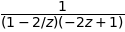

In [2]:
z = sy.symbols('z', complex=True)
f = (1/(1-2*z**(-1) )) * ( 1  / (1-2*z) )
f

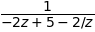

In [3]:
sy.expand(f)

$$
Y(z) = X(z) X(1/z) = \frac{1}{-2z + 5 - 2z^{-1}}
$$

Since we want to work with polynomials in the variable $z^{-1}$ so we want to get rid of $z$:

\begin{align}
Y(z) &= \frac{z^{-1}(1)}{z^{-1}  \left( -2z + 5 - 2z^{-1} \right) }
     &= \frac{z^{-1}}{  -2 + 5z^{-1} - 2z^{-2} }
\end{align}

ROC of the first product $|z|<2$ and ROC of the second product is $1/(|z|<2)$

<div class="warning">
<ul>
<li>Solution set has a different result. Why?</li>
<li>How do we compute ROC for $Y(z)$?</li>
</ul>
</div>

----
### Exercise 3.6 d)

We need to determine the $z$-transform and the corresponding ROC for:

$$
y[n] = nx[n]
$$

By table lookup, we can use the **differentiation** property


<img src="figures/lecture-01/z-transform-property-differentiation.png" width="600" />







The $z$-transform of $y[n]$ can be computed:

$$
Y(z) = -z \frac{d X(z)}{dz} = -z \frac{d }{dz} \left [ \frac{1}{1-2z^{-1}} \right ]
$$

The derivative can be computed in sympy:

In [4]:
z = sy.symbols('z', complex=True)
f = 1/(1-2* z**(-1))
-z * sy.Matrix([f]).jacobian((z,))

⎡    2     ⎤
⎢──────────⎥
⎢         2⎥
⎢  ⎛    2⎞ ⎥
⎢z⋅⎜1 - ─⎟ ⎥
⎣  ⎝    z⎠ ⎦

$$
Y(z) = -z \frac{d X(z)}{dz} = -z \frac{d }{dz} \left [ \frac{1}{1-2z^{-1}} \right ]
= \frac{2}{z(1-2/z)^2}
$$

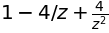

In [5]:
sy.expand((1-2/z)**2)

Since we want to work with polynomials in the variable $z^{-1}$ so we want to get rid of $z$s:

\begin{align}
Y(z) &= \frac{2}{z(1-2/z)^2}\\
     &= \frac{2}{z( 1 - 4z^{-1} + 4z^{-2} )} \\
     &= \frac{z^{-1}(2)}{z^{-1}z( 1 - 4z^{-1} + 4z^{-2} )} \\
     &= \frac{2z^{-1}}{1 - 4z^{-1} + 4z^{-2}} \\
\end{align}

The ROC for $Y(z)$ is $|z| < 2$ (the same as for $X(z)$)

----
### Exercise 3.6 e)

We need to determine the $z$-transform and the corresponding ROC for:

$$
y[n] = x[n-1] + x[n+2]
$$

By table lookup, we use two $z$-transform properties; **linearity and time shifting**:



<img src="figures/lecture-01/z-transform-property-linearity.png" width="600" />

<img src="figures/lecture-01/z-transform-property-time-shifting.png" width="600" />






Given 
$$
X(z) = \frac{1}{1-2z^{-1}}
$$

The $z$-transform of $y[n]$ can be computed:

\begin{align}
Y(z) &= z^{-1} X(z)  + z^{2} X(z) \\
     &= \frac{z^{-1}}{1-2z^{-1}} + \frac{z^{2}}{1-2z^{-1}} \\
     &= \frac{z^{-1} + z^{2}}{1-2z^{-1}} \\
\end{align}

We want to work with polynomials in the variable $z^{-1}$ so we want to get rid of $z^{2}$:

\begin{align}
Y(z) &= \frac{z^{-2} (z^{-1} + z^{2}) }{z^{-2}  (1-2z^{-1}) } \\
     &= \frac{1 + z^{-3} }{z^{-2} - 2 z^{-3} } \\
\end{align}

<div class="warning">
<ul>
<li>How do we compute ROC for $Y(z)$?</li>
</ul>
</div>

----
### Exercise 3.6 f)

We need to determine the $z$-transform and the corresponding ROC for:

$$
y[n] = x[n] * x[n-2]
$$

We can utilise two $z$-transform properties; **convolution and time shifting**.



<img src="figures/lecture-01/z-transform-property-convolution.png" width="600" />

<img src="figures/lecture-01/z-transform-property-time-shifting.png" width="600" />



Given 
$$
X(z) = \frac{1}{1-2z^{-1}}
$$

The $z$-transform of $y[n] = x[n] * x[n-2]$ can be computed:

\begin{align}
Y(z) &= X(z) \cdot  z^{-2} X(z) \\
     &= \frac{1}{1-2z^{-1}}  \cdot  z^{-2}\cdot \frac{1}{1-2z^{-1}} \\
     &= \frac{1}{1-2z^{-1}}  \cdot  \frac{1}{z^2}\cdot \frac{1}{1-2z^{-1}} \\
     &= \frac{1}{z^2 \left( 1-2z^{-1} \right )^2}  \\
     &= \frac{1}{z^2 \left( 1 - 4z^{-1}+ 4z^{-2} \right )}  \\
     &= \frac{z^{-2}(1)}{z^{-2} z^2 \left( 1 - 4z^{-1}+ 4z^{-2} \right )}  \\
     &= \frac{z^{-2}}{1 - 4z^{-1}+ 4z^{-2}}  \\
\end{align}

<div class="warning">
<ul>
<li>How do we compute ROC for $Y(z)$?</li>
</ul>
</div>

---
## Problem 3.16

<img src="figures/homework-01/problem-3.16.png" width="800" />


### Exercise 3.16 a)



First, we compute the $z$-transform $x[n] = u[n]$ (unit step sequence):

$$
X(z) = \frac{1}{1-z^{-1}}
$$

ROC is $|z| > 1$

Next, we compute the $z$-transform $y[n] = 2(1/3)^n u[n]$. We use the following formula:

\begin{align}
c a^n u[n] \longleftrightarrow \frac{c}{1-az^{-1}}
\end{align}

So we get

$$
Y(z) = \frac{2}{1- \frac{1}{3}z^{-1}}
$$

ROC is $|z| > 1/3$

Since $Y(z) = H(z)X(z)$, the transfer function $H(z)$ can be computed as follows:

$$
H(z) = \frac{Y(z)}{X(z)} = \frac{2}{1-\frac{1}{3} z^{-1}} \cdot \frac{1-z^{-1}}{1}
= \frac{2(1-z^{-1})}{1-\frac{1}{3} z^{-1}}
= \frac{2-2z^{-1}}{1-\frac{1}{3} z^{-1}}
$$

<div class="warning">
The ROC for $H(z)$ is $|z| > 1/3$. But why?
</div>

To get the impulse response $h[n]$, partial fraction expansion must be computed using `residuez`.

In [11]:
b = [2, -2]
a = [1, -1/3]
utils.partial_fraction(b, a)

Coefficients: [ 6.0000]
Residues:     [-4.0000]
Poles:        [ 0.3333]


Using this result, we have:

$$
H(z) = \frac{2-2z^{-1}}{1-\frac{1}{3} z^{-1}}
 = 6 + \frac{-4}{1-\frac{1}{3} z^{-1}}
$$

Once the partial fraction expansion is computed, we can take the inverse $z$-transform of each term in $H(z)$. We can use a lookup table to find common $z$-transform pairs:


<img src="figures/lecture-01/table-3.1-common-z-transform-pairs.png" width="500" />
















In our case, we can use following pairs:

\begin{align}
\delta[n]  &\longleftrightarrow 1 \\
c a^n u[n] &\longleftrightarrow \frac{c}{1-az^{-1}}
\end{align}



The final solution is:

$$
h[n] = 6\delta[n] -4 \left( \frac{1}{3} \right)^n u[n]
$$

----
### Exercise 3.16 b)


We need to find the output $y[n]$ for the input $x[n] = (1/2)^n u[n]$.

One method is of solving it by convolution: $y[n] = h[n] * x[n]$.

A simpler method is to compute it in $z$-domain. For this, we need to take the $z$-transform  of $x[n]$.

$$
X(z) = \frac{1}{1 - \frac{1}{2} z^{-1}}
$$

Next, we need to compute:

$$
Y(z) = H(z)X(z) = \frac{2-2z^{-1}}{1-\frac{1}{3} z^{-1}} \cdot \frac{1}{1 - \frac{1}{2} z^{-1}}
= \frac{2 - 2z^{-1}}{ 1 - \frac{5}{6} z^{-1}  + \frac{1}{6} z^{-2} }
$$

To convert $Y(z)$, we compute the partial fraction expansion using `residuez`:

In [13]:
b = [2, -2]
a = [1, -5/6, 1/6]
utils.partial_fraction(b, a)

Coefficients: [ 0.0000]
Residues:     [ 8.0000, -6.0000]
Poles:        [ 0.3333,  0.5000]


This means we have:

$$
Y(z) = \frac{8}{1 - \frac{1}{3} z^{-1}} +
\frac{-6}{1 - \frac{1}{2} z^{-1}}
$$

Once the partial fraction expansion is computed, we can take the inverse $z$-transform of each term in $H(z)$.

In this case, we can use following pair:

\begin{align}
c a^n u[n] &\longleftrightarrow \frac{c}{1-az^{-1}}
\end{align}

This means that the output $y[n]$ is:

$$
y[n] = 8 \left(\frac{1}{3} \right)^n u[n]  -6 \left(\frac{1}{2} \right)^n u[n]
$$

---
## Problem 5.11

<img src="figures/homework-01/problem-5.11.png" width="800" />


---
## ADSI Problem 1.1



<img src="figures/adsi-problems/1.1.png" width="700" />




<img src="figures/adsi-problems/1.1-1.png" width="700" />





<img src="figures/adsi-problems/1.1-2.png" width="700" />





<img src="figures/adsi-problems/1.1-3.png" width="700" />


---
## ADSI Problem 1.2



<img src="figures/adsi-problems/1.2-1.png" width="700" />








<img src="figures/adsi-problems/1.2-2.png" width="700" />




<img src="figures/adsi-problems/1.2-3.png" width="700" />


---
## ADSI Problem 1.3





<img src="figures/adsi-problems/1.3-1.png" width="700" />








<img src="figures/adsi-problems/1.3-2.png" width="700" />








<img src="figures/adsi-problems/1.3-3.png" width="700" />








<img src="figures/adsi-problems/1.3-4.png" width="700" />








<img src="figures/adsi-problems/1.3-4.png" width="700" />




